# Clustering Crypto

In [278]:
# Initial imports
import pandas as pd
import hvplot.pandas
from path import Path
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import hvplot.pandas
from matplotlib import pyplot as plt

### Deliverable 1: Preprocessing the Data for PCA

In [279]:
# Load the crypto_data.csv dataset.
crypto_df = pd.read_csv('crypto_data.csv')
crypto_df.set_index('Unnamed: 0', drop=True, inplace=True)
crypto_df.index.name = ""
crypto_df.head(10)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
,,,,,,
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0


In [280]:
# Load the crypto_data.csv dataset.
# YOUR CODE HERE

In [281]:
# Keep all the cryptocurrencies that are being traded.
crypto_df = crypto_df.loc[crypto_df['IsTrading']==True]
print(crypto_df.shape)
crypto_df.head(10)

(1144, 6)


,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
,,,,,,
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0


In [282]:
# Keep all the cryptocurrencies that have a working algorithm.
crypto_df['Algorithm'].dropna()


42           Scrypt
365             X11
404          Scrypt
611         SHA-256
808         SHA-256
           ...     
SERO         Ethash
UOS         SHA-256
BDX     CryptoNight
ZEN        Equihash
XBC          Scrypt
Name: Algorithm, Length: 1144, dtype: object

In [283]:
print(crypto_df.shape)
crypto_df.head(10)

(1144, 6)


,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
,,,,,,
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0


In [284]:
# Remove the "IsTrading" column. 
crypto_df = crypto_df.drop(["IsTrading"], axis=1)
print(crypto_df.shape)
crypto_df.head(10)

(1144, 5)


,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
,,,,,
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0


In [285]:
# Remove rows that have at least 1 null value.
crypto_df.isna().sum()

CoinName             0
Algorithm            0
ProofType            0
TotalCoinsMined    459
TotalCoinSupply      0
dtype: int64

In [286]:
crypto_df.isnull().sum(axis = 1)


42      0
365     1
404     0
611     1
808     0
       ..
SERO    1
UOS     1
BDX     0
ZEN     0
XBC     0
Length: 1144, dtype: int64

In [287]:
crypto_df = crypto_df.dropna()

In [288]:
print(crypto_df.shape)
crypto_df.head(10)

(685, 5)


,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
,,,,,
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000
DASH,Dash,X11,PoW/PoS,9.031294e+06,22000000
XMR,Monero,CryptoNight-V7,PoW,1.720114e+07,0


In [289]:
# Keep the rows where coins are mined.
crypto_df = crypto_df.loc[crypto_df['TotalCoinsMined']>0]
print(crypto_df.shape)
crypto_df.head(10)

(532, 5)


,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
,,,,,
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000
DASH,Dash,X11,PoW/PoS,9.031294e+06,22000000
XMR,Monero,CryptoNight-V7,PoW,1.720114e+07,0
ETC,Ethereum Classic,Ethash,PoW,1.133597e+08,210000000


In [290]:
# Create a new DataFrame that holds only the cryptocurrencies names.
crypto_cur_df = crypto_df[['CoinName']]
print(crypto_cur_df.shape)
crypto_cur_df.head()

(532, 1)


,CoinName
,
42,42 Coin
404,404Coin
1337,EliteCoin
BTC,Bitcoin
ETH,Ethereum


In [291]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm.
crypto_df = crypto_df.drop(["CoinName"], axis=1)
print(crypto_df.shape)
crypto_df.head(10)

(532, 4)


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
,,,,
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
LTC,Scrypt,PoW,6.303924e+07,84000000
DASH,X11,PoW/PoS,9.031294e+06,22000000
XMR,CryptoNight-V7,PoW,1.720114e+07,0
ETC,Ethash,PoW,1.133597e+08,210000000


In [292]:
# Use get_dummies() to create variables for text features.
Y = crypto_df[['Algorithm','ProofType']].copy()
Y = pd.get_dummies(Y)

In [293]:
Y

,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,Algorithm_Counterparty,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
,,,,,,,,,,,,,,,,,,,,,
42,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEPH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAP,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BDX,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [294]:
crypto_labeled_df = crypto_df.join(Y, how='inner')
print(crypto_labeled_df.shape)
crypto_labeled_df.head(10)

(532, 100)


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
,,,,,,,,,,,,,,,,,,,,,
42,Scrypt,PoW/PoS,4.199995e+01,42,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,Scrypt,PoW/PoS,1.055185e+09,532000000,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,X13,PoW/PoS,2.927942e+10,314159265359,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,SHA-256,PoW,1.792718e+07,21000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,Ethash,PoW,1.076842e+08,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LTC,Scrypt,PoW,6.303924e+07,84000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DASH,X11,PoW/PoS,9.031294e+06,22000000,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
XMR,CryptoNight-V7,PoW,1.720114e+07,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETC,Ethash,PoW,1.133597e+08,210000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [295]:
X = crypto_labeled_df.drop(['Algorithm','ProofType'], axis=1)
print(X.shape)
X.head(10)

(532, 98)


,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
,,,,,,,,,,,,,,,,,,,,,
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LTC,6.303924e+07,84000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DASH,9.031294e+06,22000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
XMR,1.720114e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETC,1.133597e+08,210000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [296]:
# Standardize the data with StandardScaler().
X_scaled = StandardScaler().fit_transform(X)
X_scaled[:5]

array([[-0.11710817, -0.1528703 , -0.0433963 , -0.0433963 , -0.0433963 ,
        -0.06142951, -0.07530656, -0.0433963 , -0.06142951, -0.06142951,
        -0.0433963 , -0.0433963 , -0.19245009, -0.06142951, -0.09740465,
        -0.0433963 , -0.11547005, -0.07530656, -0.0433963 , -0.0433963 ,
        -0.15191091, -0.0433963 , -0.13118084, -0.0433963 , -0.0433963 ,
        -0.08703883, -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
        -0.06142951, -0.0433963 , -0.08703883, -0.08703883, -0.08703883,
        -0.0433963 , -0.13118084, -0.13840913, -0.13840913, -0.0433963 ,
        -0.06142951, -0.0433963 , -0.07530656, -0.18168574, -0.0433963 ,
        -0.0433963 , -0.0433963 , -0.07530656, -0.15826614, -0.31491833,
        -0.0433963 , -0.08703883, -0.07530656, -0.06142951,  1.38675049,
        -0.0433963 , -0.0433963 , -0.06142951, -0.0433963 , -0.0433963 ,
        -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
        -0.0433963 , -0.39879994, -0.0433963 , -0.1

### Deliverable 2: Reducing Data Dimensions Using PCA

In [297]:
# Using PCA to reduce dimension to three principal components.
pca = PCA(n_components=3)
pca.fit(X_scaled)
print(pca.explained_variance_ratio_)

X_pca = pca.transform(X_scaled)

[0.02793085 0.02131238 0.02049005]


In [298]:
X_pca

array([[-0.33644696,  1.01050718, -0.59243194],
       [-0.3197738 ,  1.01026941, -0.59286031],
       [ 2.31640956,  1.42021714, -0.63475187],
       ...,
       [ 0.31931604, -2.25968414,  0.4513109 ],
       [-0.14383992, -2.11484015,  0.43793063],
       [-0.29507164,  0.8980134 , -0.31912106]])

In [300]:
# Create a DataFrame with the three principal components.
pcs_df = pd.DataFrame(X_pca, columns=['PC 1','PC 2', 'PC 3'], index=crypto_df.index)


In [301]:
print(pcs_df.shape)
pcs_df

(532, 3)


,PC 1,PC 2,PC 3
,,,
42,-0.336447,1.010507,-0.592432
404,-0.319774,1.010269,-0.592860
1337,2.316410,1.420217,-0.634752
BTC,-0.144436,-1.337356,0.251780
ETH,-0.154263,-1.985175,0.449243
...,...,...,...
ZEPH,2.470672,1.019577,-0.123478
GAP,-0.334492,1.010342,-0.592457
BDX,0.319316,-2.259684,0.451311


### Deliverable 3: Clustering Crytocurrencies Using K-Means

#### Finding the Best Value for `k` Using the Elbow Curve

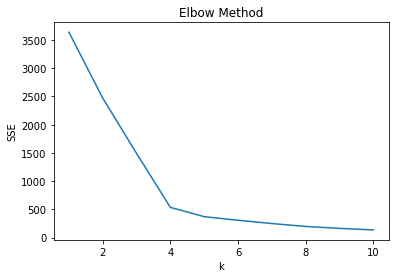

In [303]:
# Create an elbow curve to find the best value for K.
sse = {}
K = range(1, 11)
for k in K:
    kmeanmodel = KMeans(n_clusters=k).fit(pcs_df)
    sse[k]= kmeanmodel.inertia_
    
# Plot
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

Running K-Means with `k=4`

In [304]:
# Initialize the K-Means model.
model = KMeans(n_clusters=4, random_state=500)
model

# Fit the model
model.fit(pcs_df)

# Predict clusters
y_pred = model.predict(pcs_df)
y_pred

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,

In [307]:
# Create a new DataFrame including predicted clusters and cryptocurrencies features.
# Concatentate the crypto_df and pcs_df DataFrames on the same columns.
clustered_df = pd.concat([crypto_df, pcs_df], axis=1, join='outer')


#  Add a new column, "CoinName" to the clustered_df DataFrame that holds the names of the cryptocurrencies. 
clustered_df['CoinName'] = crypto_cur_df;

#  Add a new column, "Class" to the clustered_df DataFrame that holds the predictions.
clustered_df['Class'] = y_pred;

# Print the shape of the clustered_df
print(clustered_df.shape)
clustered_df.head(10)

(532, 9)


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC 1,PC 2,PC 3,CoinName,Class
,,,,,,,,,
42,Scrypt,PoW/PoS,4.199995e+01,42,-0.336447,1.010507,-0.592432,42 Coin,0
404,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.319774,1.010269,-0.592860,404Coin,0
1337,X13,PoW/PoS,2.927942e+10,314159265359,2.316410,1.420217,-0.634752,EliteCoin,0
BTC,SHA-256,PoW,1.792718e+07,21000000,-0.144436,-1.337356,0.251780,Bitcoin,1
ETH,Ethash,PoW,1.076842e+08,0,-0.154263,-1.985175,0.449243,Ethereum,1
LTC,Scrypt,PoW,6.303924e+07,84000000,-0.172993,-1.031221,-0.014137,Litecoin,1
DASH,X11,PoW/PoS,9.031294e+06,22000000,-0.385618,1.061537,-0.485555,Dash,0
XMR,CryptoNight-V7,PoW,1.720114e+07,0,-0.152857,-2.141750,0.451355,Monero,1
ETC,Ethash,PoW,1.133597e+08,210000000,-0.152704,-1.985314,0.449224,Ethereum Classic,1


### Deliverable 4: Visualizing Cryptocurrencies Results

#### 3D-Scatter with Clusters

In [309]:
# Creating a 3D-Scatter with the PCA data and the clusters
# Add the CoinName and Algorithm columns to the hover_name and hover_data parameters,
# respectively, so each data point shows the CoinName and Algorithm on hover
fig = px.scatter_3d(
    clustered_df,
    x="PC 1",
    y="PC 2",
    z="PC 3",
    hover_name='CoinName',
    hover_data= ['Algorithm'],
    color="Class",
    symbol="Class",
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()


In [310]:
# Create a table with tradable cryptocurrencies.
columns = ['CoinName', 'Algorithm', 'ProofType', 'TotalCoinSupply', 'TotalCoinsMined', 'Class']
crypto_table = clustered_df.hvplot.table(columns)
crypto_table

:Table   [CoinName,Algorithm,ProofType,TotalCoinSupply,TotalCoinsMined,Class]

In [311]:
# Print the total number of tradable cryptocurrencies.
index = clustered_df.index
number_of_rows = len(index)
print(f"There are {number_of_rows} tradable cryptocurrencies")

There are 532 tradable cryptocurrencies


In [312]:
# Scaling data to create the scatter plot with tradable cryptocurrencies.
TCC = clustered_df[['TotalCoinSupply', 'TotalCoinsMined']]
TCC_scaled = MinMaxScaler().fit_transform(TCC)
TCC_scaled

array([[4.20000000e-11, 0.00000000e+00],
       [5.32000000e-04, 1.06585544e-03],
       [3.14159265e-01, 2.95755135e-02],
       ...,
       [1.40022261e-03, 9.90135079e-04],
       [2.10000000e-05, 7.37028150e-06],
       [1.00000000e-06, 1.29582282e-07]])

In [314]:
# Create a new DataFrame that has the scaled data with the clustered_df DataFrame index.
plot_df = pd.DataFrame(TCC_scaled, columns=['TotalCoinSupply', 'TotalCoinsMined'], index=clustered_df.index)


# Add the "CoinName" column from the clustered_df DataFrame to the new DataFrame.
plot_df['CoinName'] = clustered_df['CoinName']

# Add the "Class" column from the clustered_df DataFrame to the new DataFrame. 
plot_df['Class'] = clustered_df['Class']

plot_df.head(10)

,TotalCoinSupply,TotalCoinsMined,CoinName,Class
,,,,
42,4.200000e-11,0.000000,42 Coin,0
404,5.320000e-04,0.001066,404Coin,0
1337,3.141593e-01,0.029576,EliteCoin,0
BTC,2.100000e-05,0.000018,Bitcoin,1
ETH,0.000000e+00,0.000109,Ethereum,1
LTC,8.400000e-05,0.000064,Litecoin,1
DASH,2.200000e-05,0.000009,Dash,0
XMR,0.000000e+00,0.000017,Monero,1
ETC,2.100000e-04,0.000115,Ethereum Classic,1


In [315]:
# Create a hvplot.scatter plot using x="TotalCoinsMined" and y="TotalCoinSupply".
plot_df.hvplot.scatter(x="TotalCoinsMined", y="TotalCoinSupply", by='Class')


:NdOverlay   [Class]
   :Scatter   [TotalCoinsMined]   (TotalCoinSupply)